<a href="https://colab.research.google.com/github/Munya07/NLP/blob/master/3_Chat_bot/RASA_Conversational_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')



# Installations
* Rasa NLU
* Rasa Core
* SpaCy Language Model

In [0]:
!pip install git+https://github.com/apixu/apixu-python.git@master

  Cloning https://github.com/apixu/apixu-python.git (to revision master) to /tmp/pip-req-build-an_w4fnq
  Running command git clone -q https://github.com/apixu/apixu-python.git /tmp/pip-req-build-an_w4fnq
  Stored in directory: /tmp/pip-ephem-wheel-cache-_kef5vet/wheels/7d/5f/b2/36b86f6242de7489d68f490ad130c5472dcbb5ec28147fce6a
Successfully built apixu


In [0]:
import sys
python = sys.executable

# In your environment run:
!{python} -m pip install -U rasa_core==0.9.6 rasa_nlu[spacy];

     |████████████████████████████████| 133kB 2.6MB/s 
     |████████████████████████████████| 153kB 43.8MB/s 
     |████████████████████████████████| 61kB 22.5MB/s 
     |████████████████████████████████| 307kB 43.2MB/s 
     |████████████████████████████████| 71kB 20.3MB/s 
     |████████████████████████████████| 51kB 22.3MB/s 
     |████████████████████████████████| 993kB 38.2MB/s 
     |████████████████████████████████| 49.1MB 736kB/s 
     |████████████████████████████████| 71kB 24.4MB/s 
     |████████████████████████████████| 4.9MB 27.7MB/s 
     |████████████████████████████████| 665kB 39.3MB/s 
     |████████████████████████████████| 12.8MB 15.1MB/s 
     |████████████████████████████████| 81kB 19.0MB/s 
     |████████████████████████████████| 204kB 39.0MB/s 
     |████████████████████████████████| 81kB 23.2MB/s 
     |████████████████████████████████| 3.1MB 27.7MB/s 
     |████████████████████████████████| 3.1MB 26.7MB/s 
     |████████████████████████████████| 757kB 24.4MB/s

In [0]:
!{python} -m spacy download en_core_web_md

     |████████████████████████████████| 120.9MB 1.0MB/s 
  Stored in directory: /tmp/pip-ephem-wheel-cache-53pyn_db/wheels/db/5d/d0/ccdad6b01f9695b4a33793158530b3228223ee31463441663d
Successfully built en-core-web-md

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_md -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en_core_web_md

    You can now load the model via spacy.load('en_core_web_md')



## Downloading the English Language Model

In [0]:
!{python} -m spacy link en_core_web_md en --force;


    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_md -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en

    You can now load the model via spacy.load('en')



# Importing the Installations

In [0]:
import rasa_nlu
import rasa_core
import spacy



# 1. Teaching the bot to understand user inputs using Rasa NLU

## Preparing the NLU Training Data

In [0]:
nlu_json = """
{
  "rasa_nlu_data": {
    "common_examples": [
      {
        "text": "Hello",
        "intent": "greet",
        "entities": []
      },
      {
        "text": "goodbye",
        "intent": "goodbye",
        "entities": []
      },
      {
        "text": "What's the weather in Berlin at the moment?",
        "intent": "inform",
        "entities": [
          {
            "start": 22,
            "end": 28,
            "value": "Berlin",
            "entity": "location"
          }
        ]
      },
      {
        "text": "hie",
        "intent": "greet",
        "entities": []
      },
      {
        "text": "hey",
        "intent": "greet",
        "entities": []
      },
      {
        "text": "hello",
        "intent": "greet",
        "entities": []
      },
      {
        "text": "hi",
        "intent": "greet",
        "entities": []
      },
      {
        "text": "heya",
        "intent": "greet",
        "entities": []
      },
      {
        "text": "howdy",
        "intent": "greet",
        "entities": []
      },
      {
        "text": "hey there",
        "intent": "greet",
        "entities": []
      },
      {
        "text": "bye",
        "intent": "goodbye",
        "entities": []
      },
      {
        "text": "goodbye",
        "intent": "goodbye",
        "entities": []
      },
      {
        "text": "bye bye",
        "intent": "goodbye",
        "entities": []
      },
      {
        "text": "see ya",
        "intent": "goodbye",
        "entities": []
      },
      {
        "text": "see you later",
        "intent": "goodbye",
        "entities": []
      },
      {
        "text": "What's the weather today?",
        "intent": "inform",
        "entities": []
      },
      {
        "text": "What's the weather in London today?",
        "intent": "inform",
        "entities": [
          {
            "start": 22,
            "end": 28,
            "value": "London",
            "entity": "location"
          }
        ]
      },
      {
        "text": "Show me what's the weather in Paris",
        "intent": "inform",
        "entities": [
          {
            "start": 30,
            "end": 35,
            "value": "Paris",
            "entity": "location"
          }
        ]
      },
      {
        "text": "I wonder what is the weather in Vilnius right now?",
        "intent": "inform",
        "entities": [
          {
            "start": 32,
            "end": 39,
            "value": "Vilnius",
            "entity": "location"
          }
        ]
      },
      {
        "text": "what is the weather?",
        "intent": "inform",
        "entities": []
      },
      {
        "text": "Tell me the weather",
        "intent": "inform",
        "entities": []
      },
      {
        "text": "Is the weather nice in Barcelona today?",
        "intent": "inform",
        "entities": [
          {
            "start": 23,
            "end": 32,
            "value": "Barcelona",
            "entity": "location"
          }
        ]
      },
      {
        "text": "I am going to London today and I wonder what is the weather out there?",
        "intent": "inform",
        "entities": [
          {
            "start": 14,
            "end": 20,
            "value": "London",
            "entity": "location"
          }
        ]
      },
      {
        "text": "I am planning my trip to Amsterdam. What is the weather out there?",
        "intent": "inform",
        "entities": [
          {
            "start": 25,
            "end": 34,
            "value": "Amsterdam",
            "entity": "location"
          }
        ]
      },
      {
        "text": "Show me the weather in Dublin, please",
        "intent": "inform",
        "entities": [
          {
            "start": 23,
            "end": 29,
            "value": "Dublin",
            "entity": "location"
          }
        ]
      },
      {
        "text": "London",
        "intent": "inform",
        "entities": [
          {
            "start": 0,
            "end": 6,
            "value": "London",
            "entity": "location"
          }
        ]
      },
      {
        "text": "Harare",
        "intent": "inform",
        "entities": [
          {
            "start": 0,
            "end": 6,
            "value": "Harare",
            "entity": "location"
          }
        ]
      },
      {
        "text": "Paris",
        "intent": "inform",
        "entities": [
          {
            "start": 0,
            "end": 5,
            "value": "Paris",
            "entity": "location"
          }
        ]
      },
      {
        "text": "Brazil",
        "intent": "inform",
        "entities": [
          {
            "start": 0,
            "end": 6,
            "value": "Brazil",
            "entity": "location"
          }
        ]
      },
      {
        "text": "Zambia",
        "intent": "inform",
        "entities": [
          {
            "start": 0,
            "end": 6,
            "value": "Zambia",
            "entity": "location"
          }
        ]
      },
      {
        "text": "in London",
        "intent": "inform",
        "entities": [
          {
            "start": 3,
            "end": 9,
            "value": "London",
            "entity": "location"
          }
        ]
      },
      {
        "text": "Lithuania",
        "intent": "inform",
        "entities": [
          {
            "start": 0,
            "end": 9,
            "value": "Lithuania",
            "entity": "location"
          }
        ]
      },
      {
        "text": "Oh, sorry, in Italy",
        "intent": "inform",
        "entities": [
          {
            "start": 14,
            "end": 19,
            "value": "Italy",
            "entity": "location"
          }
        ]
      },
      {
        "text": "Tell me the weather in Vilnius",
        "intent": "inform",
        "entities": [
          {
            "start": 23,
            "end": 30,
            "value": "Vilnius",
            "entity": "location"
          }
        ]
      },
      {
        "text": "The weather condition in Italy",
        "intent": "inform",
        "entities": [
          {
            "start": 25,
            "end": 30,
            "value": "Italy",
            "entity": "location"
          }
        ]
      }
    ]
  }
}
"""

%store nlu_json > nlu.json

Writing 'nlu_json' (str) to file 'nlu.json'.


## Defining the NLU Model Configuration

In [0]:
config = """
language: "en"

pipeline:
- name: "nlp_spacy"                   # loads the spacy language model
- name: "tokenizer_spacy"             # splits the sentence into tokens
- name: "ner_crf"                   # uses the pretrained spacy NER model
- name: "intent_featurizer_spacy"     # transform the sentence into a vector representation
- name: "intent_classifier_sklearn"   # uses the vector representation to classify using SVM
- name: "ner_synonyms"                # trains the synonyms
""" 

%store config > config.yml

Writing 'config' (str) to file 'config.yml'.


## Training the NLU Model.

In [0]:
from rasa_nlu.training_data import load_data
from rasa_nlu.config import RasaNLUModelConfig
from rasa_nlu.model import Trainer
from rasa_nlu import config

# loading the nlu training samples
training_data = load_data("nlu.json")

# trainer to educate our pipeline
trainer = Trainer(config.load("config.yml"))

# train the model!
interpreter = trainer.train(training_data)

# store it for future use
model_directory = trainer.persist("./models/nlu", fixed_model_name="current")

INFO:rasa_nlu.training_data.loading:Training data format of nlu.json is rasa_nlu
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 35 (3 distinct intents)
	- Found intents: 'goodbye', 'inform', 'greet'
	- entity examples: 18 (1 distinct entities)
	- found entities: 'location'

INFO:rasa_nlu.utils.spacy_utils:Trying to load spacy model with name 'en'
INFO:rasa_nlu.components:Added 'SpacyNLP' to component cache. Key 'SpacyNLP-en'.
INFO:rasa_nlu.model:Starting to train component SpacyNLP
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component SpacyTokenizer
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component CRFEntityExtractor
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component SpacyFeaturizer
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component SklearnIntentClassifier
[Parallel(n_jo

Fitting 2 folds for each of 6 candidates, totalling 12 fits


## Evaluating the NLU model on a random text

In [0]:
# A helper function for prettier output

def pprint(o):   
    print(json.dumps(o, indent=2))
    
pprint(interpreter.parse("what is the weather in Harare"))

{
  "intent": {
    "name": "inform",
    "confidence": 0.9192710021760874
  },
  "entities": [
    {
      "start": 23,
      "end": 29,
      "value": "harare",
      "entity": "location",
      "confidence": 0.9811448497847622,
      "extractor": "CRFEntityExtractor"
    }
  ],
  "intent_ranking": [
    {
      "name": "inform",
      "confidence": 0.9192710021760874
    },
    {
      "name": "goodbye",
      "confidence": 0.051169638179559426
    },
    {
      "name": "greet",
      "confidence": 0.02955935964435309
    }
  ],
  "text": "what is the weather in Harare"
}


## Evaluating the NLU model on a test data
(Here we are using the data at hand i.e nlu.md but it isr recommended to use unseen data)

# 2. Teaching the bot to respond using Rasa Core

## 1. Writing  Stories

In [0]:
stories_md = """
## Generated Story 3320800183399695936
* greet
    - utter_greet
* inform
    - utter_ask_location
* inform{"location": "italy"}
    - slot{"location": "italy"}
    - action_weather
    - slot{"location": "italy"}
* inform{"location": "Harare"}
    - slot{"location": "Harare"}
    - action_weather
    - slot{"location": "Harare"}

## Generated Story 3320800183399695936
* greet
    - utter_greet
* inform
    - utter_ask_location
* inform{"location": "italy"}
    - slot{"location": "italy"}
    - action_weather
    - slot{"location": "italy"}
* goodbye
    - utter_goodbye
    - export
## Generated Story -3351152636827275381
* greet
    - utter_greet
* inform[location=London]
    - slot{"location": "London"}
    - action_weather
* goodbye
    - utter_goodbye
    - export
## Generated Story 8921121480760034253
* greet
    - utter_greet
* inform
    - utter_ask_location
* inform[location=London]
    - slot{"location": "London"}
    - action_weather
* goodbye
    - utter_goodbye
    - export
## Generated Story -5208991511085841103
    - slot{"location": "London"}
    - action_weather
* goodbye
    - utter_goodbye
    - export
## Generated Story -5208991511085841103
    - slot{"location": "London"}
    - action_weather
* goodbye
    - utter_goodbye
    - export
## story_001
* greet
   - utter_greet
* inform
   - utter_ask_location
* inform[location=London]
   - slot{"location": "London"}
   - action_weather
* goodbye
   - utter_goodbye
## story_002
* greet
   - utter_greet
* inform[location=Paris]
   - slot{"location": "Paris"}
   - action_weather
* goodbye
   - utter_goodbye 
## story_003
* greet
   - utter_greet
* inform
   - utter_ask_location
* inform[location=Vilnius]
   - slot{"location": "Vilnius"}
   - action_weather
* goodbye
   - utter_goodbye
## story_004
* greet
   - utter_greet
* inform[location=Italy]
   - slot{"location": "Italy"}
   - action_weather
* goodbye
   - utter_goodbye 
## story_005
* greet
   - utter_greet
* inform
   - utter_ask_location
* inform[location=Lithuania]
   - slot{"location": "Lithuania"}
   - action_weather
* goodbye
   - utter_goodbye

"""

%store stories_md > stories.md

Writing 'stories_md' (str) to file 'stories.md'.


## 2. Defining a Domain

In [0]:
domain_yml = """
slots:
  location:
    type: text


intents:
 - greet
 - goodbye
 - inform


entities:
 - location

templates:
  utter_greet:
    - 'Hello! How can I help?'
  utter_goodbye:
    - 'Talk to you later.'
    - 'Bye bye :('
  utter_ask_location:
    - 'In what location?'


actions:
 - utter_greet
 - utter_goodbye
 - utter_ask_location
 - __main__.ActionWeather
"""

%store domain_yml > domain.yml

Writing 'domain_yml' (str) to file 'domain.yml'.


## Custom Actions

In [0]:
from rasa_core.actions import Action
from rasa_core.events import SlotSet
from IPython.core.display import Image, display

from __future__ import absolute_import
from __future__ import division
from __future__ import unicode_literals

from rasa_core.actions.action import Action
from rasa_core.events import SlotSet

class ActionWeather(Action):
	def name(self):
		return 'action_weather'
		
	def run(self, dispatcher, tracker, domain):
		from apixu.client import ApixuClient
		api_key = '27240c7f9e9a4edebb8115207193105 ' #your apixu key
		client = ApixuClient(api_key)
		
		loc = tracker.get_slot('location')
		current = client.current(q=loc)
		
		country = current['location']['country']
		city = current['location']['name']
		condition = current['current']['condition']['text']
		temperature_c = current['current']['temp_c']
		humidity = current['current']['humidity']
		wind_mph = current['current']['wind_mph']

		response = """It is currently {} in {} at the moment. The temperature is {} degrees, the humidity is {}% and the wind speed is {} mph.""".format(condition, city, temperature_c, humidity, wind_mph)
						
		dispatcher.utter_message(response)
		return [SlotSet('location',loc)]


##  Visualising the Training Data

In [0]:

!apt-get -qq install -y graphviz libgraphviz-dev pkg-config;
!breq install graphviz

!{python} -m pip install pygraphviz;

Selecting previously unselected package libgtk2.0-common.
(Reading database ... 130912 files and directories currently installed.)
Preparing to unpack .../0-libgtk2.0-common_2.24.32-1ubuntu1_all.deb ...
Unpacking libgtk2.0-common (2.24.32-1ubuntu1) ...
Selecting previously unselected package libgtk2.0-0:amd64.
Preparing to unpack .../1-libgtk2.0-0_2.24.32-1ubuntu1_amd64.deb ...
Unpacking libgtk2.0-0:amd64 (2.24.32-1ubuntu1) ...
Selecting previously unselected package libgail18:amd64.
Preparing to unpack .../2-libgail18_2.24.32-1ubuntu1_amd64.deb ...
Unpacking libgail18:amd64 (2.24.32-1ubuntu1) ...
Selecting previously unselected package libgail-common:amd64.
Preparing to unpack .../3-libgail-common_2.24.32-1ubuntu1_amd64.deb ...
Unpacking libgail-common:amd64 (2.24.32-1ubuntu1) ...
Selecting previously unselected package libxdot4.
Preparing to unpack .../4-libxdot4_2.40.1-2_amd64.deb ...
Unpacking libxdot4 (2.40.1-2) ...
Selecting previously unselected package libgvc6-plugins-gtk.
Prep

INFO:apscheduler.scheduler:Scheduler started
Processed Story Blocks: 100%|██████████| 11/11 [00:00<00:00, 267.31it/s, # trackers=1]


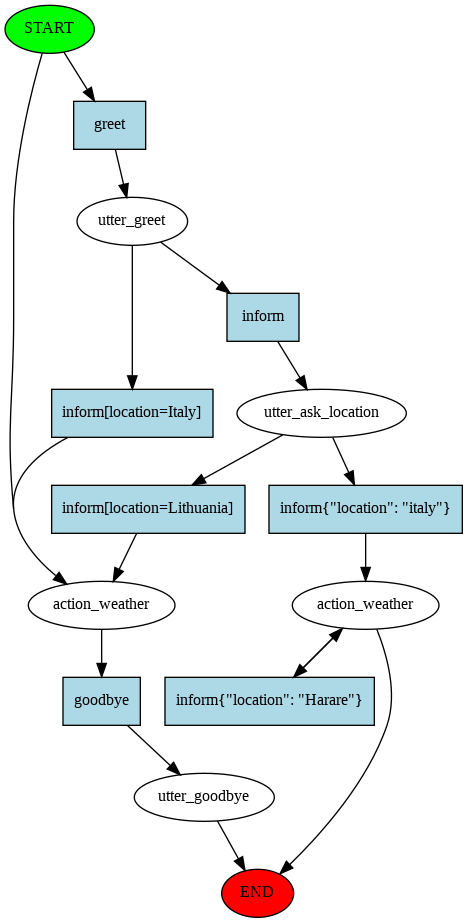

In [0]:

from IPython.display import Image
from rasa_core.agent import Agent

agent = Agent('domain.yml')
agent.visualize("stories.md", "story_graph.png", max_history=2)
Image(filename="story_graph.png")

## Training a Dialogue Model

In [0]:
from rasa_core.policies import FallbackPolicy, KerasPolicy, MemoizationPolicy
from rasa_core.agent import Agent

# this will catch predictions the model isn't very certain about
# there is a threshold for the NLU predictions as well as the action predictions


agent = Agent('domain.yml', policies=[MemoizationPolicy(), KerasPolicy()])

# loading our neatly defined training dialogues
training_data = agent.load_data('stories.md')

agent.train(
    training_data,
    augmentation_factor=500,
    validation_split=0,
    epochs=1000
)

agent.persist('models/dialogue')

Using TensorFlow backend.
Processed Story Blocks: 100%|██████████| 11/11 [00:00<00:00, 159.34it/s, # trackers=6]
INFO:rasa_core.featurizers:Creating states and action examples from collected trackers (by MaxHistoryTrackerFeaturizer)...
Processed trackers: 100%|██████████| 70/70 [00:04<00:00, 16.83it/s, # actions=54]
INFO:rasa_core.featurizers:Created 54 action examples.
Processed actions: 54it [00:00, 302.51it/s, # examples=54]
INFO:rasa_core.policies.memoization:Memorized 54 unique action examples.
INFO:rasa_core.featurizers:Creating states and action examples from collected trackers (by MaxHistoryTrackerFeaturizer)...
Processed trackers: 100%|██████████| 70/70 [00:03<00:00, 18.84it/s, # actions=54]
INFO:rasa_core.featurizers:Created 54 action examples.
INFO:rasa_core.policies.keras_policy:Fitting model with 54 total samples and a validation split of 0


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_1 (Masking)          (None, 5, 11)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                5632      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
_________________________________________________________________
activation_1 (Activation)    (None, 6)                 0         
Total params: 5,830
Trainable params: 5,830
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
54/54 [==============================] - 0s 8ms/step - loss: 1.7733 - acc: 0.1481
Epoch 2/1000
54/54 [==============================] - 0s 314us/step - loss: 1.7075 - acc: 0.3704
Epoch 3/1000
54/54 [==============================] - 0s 281us/step - loss: 1.68

INFO:rasa_core.policies.keras_policy:Done fitting keras policy model
INFO:rasa_core.agent:Persisted model to '/content/models/dialogue'


# Talk to your Bot

In [0]:
#Starting the Bot

from rasa_core.agent import Agent
agent = Agent.load('models/dialogue', interpreter=model_directory)

INFO:rasa_nlu.components:Added 'SpacyNLP' to component cache. Key 'SpacyNLP-en'.


In [0]:
print("Your bot is ready to talk! Type your messages here or send 'stop'")
while True:
    a = input()
    if a == 'stop':
        break
    responses = agent.handle_message(a)
    for response in responses:
        print(response["text"])
        

Your bot is ready to talk! Type your messages here or send 'stop'
what is the weather in moscow
It is currently Sunny in Moscow at the moment. The temperature is 26.0 degrees, the humidity is 39% and the wind speed is 4.3 mph.
hie
Hello! How can I help?
what is the weather in Novosibirsk
It is currently Partly cloudy in Novosibirsk at the moment. The temperature is 22.0 degrees, the humidity is 69% and the wind speed is 11.9 mph.
